# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.libreriadelau.com/bw-mecanica-celeste-teoria-algoritmos-y-problemas-u-de-antioquia-fisica/p). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-12-doscuerpos_ecuacion_kepler.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos del Problema de los dos Cuerpos: ecuación de Kepler

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [1]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### La ecuación de Halley

Un ejemplo de solución exacta y aproximada de la ecuación de Halley:

In [25]:
#Constantes del sistema
mu=1.0
h=3.0

#Tamaño de la parabola
p=h**2/mu

#Tiempo de paso por el periapsis
tp=0.0

#Tiempo en el que deseamos calcular f
t=1.0

#Anomalía media parabólica
from numpy import sqrt
Mp=3*sqrt(mu/p**3)*(t-tp)

#Variable auxiliar
y=(Mp+sqrt(1+Mp**2))**(1./3)

#Raíz de la ecuación de Halley
z=y-1/y

#Anomalía verdadera
from numpy import arctan
f=2*arctan(z)

#Aproximación de la anomalía media
faprox=(4./3)*Mp

#Polinomio cúbico en z
polinomio=z**3+3*z-2*Mp

from numpy import pi
print(f"Porpiedades del sistema: h={h:g}, mu={mu:g}, tp={tp:g}")
print(f"Solución al problema de Kepler en t = {t:g}:")
print(f"Anomalía parabólica: Mp = {Mp*180/pi:g} grados")
print(f"Variable auxiliar: y = {y:.7f}")
print(f"Anomalía verdadera: z = tan(f/2) = {z:.7f}")
print(f"Anomalía verdadera: f = {f*180/pi:.7f} grados")
print(f"Aproximación: 4/3 Mp = {faprox*180/pi:.7f} grados")
print(f"Polinomio: z^3 + 3z - 2Mp = {polinomio}")

Porpiedades del sistema: h=3, mu=1, tp=0
Solución al problema de Kepler en t = 1:
Anomalía parabólica: Mp = 6.3662 grados
Variable auxiliar: y = 1.0376528
Anomalía verdadera: z = tan(f/2) = 0.0739393
Anomalía verdadera: f = 8.4574333 grados
Aproximación: 4/3 Mp = 8.4882636 grados
Polinomio: z^3 + 3z - 2Mp = 7.494005416219807e-16


### La función de Kepler 

La ecuación de Kepler en forma general:

In [28]:
def funcion_kepler(G,M=0,e=0):
    #Parametro sigma
    sigma=+1 if e<1 else -1
    #Funciones cG, sG
    from numpy import cos,cosh,sin,sinh
    cG=cos(G) if e<1 else cosh(G)
    sG=sin(G) if e<1 else sinh(G)
    #Función de Kepler
    k=sigma*(G-e*sG)-M
    #Primera derivada
    kp=sigma*(1-e*cG)
    #Segunda derivada
    kpp=e*sG
    return k,kp,kpp

En el código a continuación se estudia el comportamiento de la ecuación de Kepler:

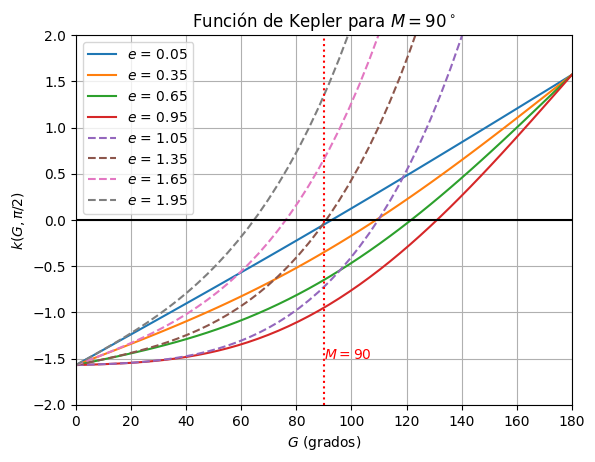

In [29]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

#Valor de la anomalía media
from numpy import pi
M=pi/2

#Valores posibles de G
from numpy import linspace
Gs=linspace(0,2*M)

#Caso elíptico
es=linspace(0.05,0.95,4)
for e in es:    
    ks,kps,kpps=funcion_kepler(Gs,M,e)
    ax.plot(Gs*180/pi,ks,label=f"$e$ = {e}",ls='-');

#Caso hiperbólico
es=linspace(1.05,1.95,4)
for e in es:    
    ks,kps,kpps=funcion_kepler(Gs,M,e)
    ax.plot(Gs*180/pi,ks,label=f"$e$ = {e}",ls='--');
   
#Decoración
ax.axhline(0,color='k')
ax.axvline(M*180/pi,color='r',linestyle='dotted')
ax.text(M*180/pi,-1.5,f"$M={M*180/pi:g}$",color='r')
ax.legend()
ax.set_xlim((0,2*M*180/pi))
ax.set_ylim((-2,2))
ax.set_xlabel("$G$ (grados)")
ax.set_ylabel("$k(G,\pi/2)$")
ax.set_title(f"Función de Kepler para $M = {M*180/pi:g}^\circ$")
ax.grid();



Una versión interactiva es:

In [33]:
from ipywidgets import interact

@interact(M=(0,360,10),e=(1e-3,2,0.05))
def grafica_funcion_kepler(M=90,e=0.5):
    #Valores de entrada
    from numpy import pi
    M=float(M)*pi/180 #M entra en grados
    e=float(e)
        
    #Grafica
    import matplotlib.pyplot as plt
    plt.close("all")
    fig=plt.figure()
    ax=fig.gca()

    #Valores posibles de G
    Gs=linspace(0,2*M)
    ks,kps,kpps=funcion_kepler(Gs,M,e)
    ax.plot(Gs*180/pi,ks);

    #Decoración
    yext=-funcion_kepler(0,M,e)[0]
    ax.axhline(0,color='k')
    ax.axvline(M*180/pi,color='r',linestyle='dotted')
    ax.text(M*180/pi,-2*yext/3,f"$M={M*180/pi:g}$",color='r')
    
    if e<1.5:
        xmax=min(2*M*180/pi,360)
    else:
        xmax=M/(e-1)*180/pi

    ax.set_xlim((0,xmax))
    ax.set_ylim((-yext,yext))
    ax.set_title(f"Función de Kepler para $M = {M*180/pi:g}^\circ$")
    ax.set_xlabel("$G$ (grados)")
    ax.set_ylabel("$k(G,\pi/2)$")
    ax.grid();

    plt.show()

interactive(children=(IntSlider(value=90, description='M', max=360, step=10), FloatSlider(value=0.5, descripti…

### Solución numérica a la ecuación de Kepler

El método de Kepler:

In [36]:
e=0.5
M=37 #grados
E0=45 

from numpy import pi
M=M*pi/180
E0=E0*pi/180

from numpy import sin
M0=E0-e*sin(E0)

print(f"M0 = {M0*180/pi} grados")

epsilon0=M-M0
E1=E0+epsilon0

print(f"epsilon0 = {epsilon0*180/pi}")
print(f"E1 = {E1*180/pi} grados")

M1=E1-e*sin(E1)
epsilon1=M-M1
E2=E1+epsilon1

print(f"M1 = {M1*180/pi}")
print(f"epsilon1 = {epsilon1*180/pi}")
print(f"E2 = {E2*180/pi}")

M0 = 24.742882886465114 grados
epsilon0 = 12.257117113534887
E1 = 57.25711711353489 grados
M1 = 33.16119928670333
epsilon1 = 3.8388007132966724
E2 = 61.09591782683156


Se puede hacer un código general para más pasos:

In [37]:
En=E2
for i in range(5):
    Mn=En-e*sin(En)
    en=M-Mn
    En=En+en
    print(f"Paso {i+3}: M{i+2} = {Mn*180/pi:.2f} gr., epsilon{i+2} = {en*180/pi:.3f} gr., E{i+3} = {En*180/pi:.5f} gr.")

Paso 3: M2 = 36.02 gr., epsilon2 = 0.983 gr., E3 = 62.07922 gr.
Paso 4: M3 = 36.77 gr., epsilon3 = 0.234 gr., E4 = 62.31316 gr.
Paso 5: M4 = 36.95 gr., epsilon4 = 0.055 gr., E5 = 62.36772 gr.
Paso 6: M5 = 36.99 gr., epsilon5 = 0.013 gr., E6 = 62.38038 gr.
Paso 7: M6 = 37.00 gr., epsilon6 = 0.003 gr., E7 = 62.38332 gr.


Usando la rutina de pymcel con el método de Kepler:

In [40]:
from pymcel import kepler_kepler
E,error,ni=kepler_kepler(M,e,E0,1e-8)

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*M*180/pi:.1e} grados")
print(f"Intervalo = [{(E-2*error*M)*180/pi},{(E+2*error*M)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420178431245
Error absoluto = 1.1e-07 grados
Intervalo = [62.38420157333525,62.384201995289665] grados
Número de iteraciones: 14


Usando el método de Newton-Raphson:

In [43]:
from pymcel import kepler_newton
E,error,ni=kepler_newton(M,e,E0,1e-8)

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420186888202
Error absoluto = 0.0e+00 grados
Intervalo = [62.38420186888202,62.38420186888202] grados
Número de iteraciones: 5


Usando el método de Laguerre-Conway:

In [44]:
from pymcel.export import funcion_kepler,metodo_laguerre
E,error,ni=metodo_laguerre(funcion_kepler,x0=E0,delta=1e-8,args=(M,e))

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420186756679
Error absoluto = 2.6e-09 grados
Intervalo = [62.38420186493632,62.384201870197266] grados
Número de iteraciones: 3


Usando métodos de horquillado:

In [46]:
from numpy import pi
from scipy import optimize

#Recuerde que funcion_kepler devuelve también las derivadas
from pymcel.export import funcion_kepler
kepler=lambda G,M,e:funcion_kepler(G,M,e)[0]

#Método de bisección
E_bis,info_bis=optimize.bisect(kepler,M-e,M+e,rtol=1e-8,
                               args=(M,e),full_output=True)
ni_bis=info_bis.iterations

#Método de Brent
E_bre,info_bre=optimize.brentq(kepler,M-e,M+e,rtol=1e-8,
                               args=(M,e),full_output=True)
ni_bre=info_bre.iterations

#Método de Ridder
E_rid,info_rid=optimize.ridder(kepler,M-e,M+e,rtol=1e-8,
                               args=(M,e),full_output=True)
ni_rid=info_rid.iterations

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"Bisección:",
      f"E = {E_bis*180/pi:.17f}",
      f"iteraciones = {ni_bis}")
print(f"Brent:",
      f"E = {E_bre*180/pi:.17f}",
      f"iteraciones = {ni_bre}")
print(f"Ridder:",
      f"E = {E_rid*180/pi:.17f}",
      f"iteraciones = {ni_rid}")

M = 37, e = 0.50
Bisección: E = 62.38420210930057408 iteraciones = 27
Brent: E = 62.38420186878084195 iteraciones = 6
Ridder: E = 62.38420218086032065 iteraciones = 4


Otros métodos:

In [47]:
from pymcel.export import kepler_semianalitico
E,error,ni=kepler_semianalitico(M,e)

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38761309530199
Error absoluto = 4.4e-03 grados
Intervalo = [62.38319428043351,62.392031910170466] grados
Número de iteraciones: 1


Se puede calcular el error de esta fórmula semianalítica:

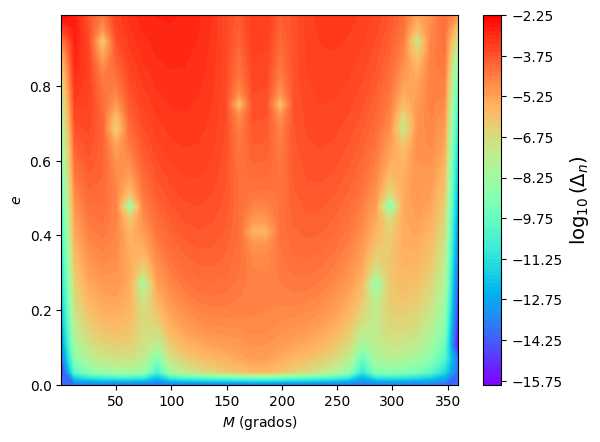

In [49]:
from numpy import linspace,pi,zeros,log10

#Valores de e y M
Ne=30
es=linspace(0,0.99,Ne)
NM=30
Ms=linspace(0.01,2*pi-0.01,NM)

#Construye la matriz de errores
log_errores=zeros((Ne,NM))
for i,ex in enumerate(es):
    for j,Mx in enumerate(Ms):
        E,error,ni=kepler_semianalitico(Mx,ex)
        log_errores[i,j]=log10(error) if error>0 else -14
        
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

#Gráfico de contorno
contorno=plt.contourf(Ms*180/pi,es,log_errores,
                      cmap="rainbow",levels=100)
color=plt.colorbar(contorno)
color.set_label("$\log_{10}(\Delta_n)$",fontsize=14)

#Decoración
ax.set_xlabel("$M$ (grados)");
ax.set_ylabel("$e$");


El comportamiento de la solución de la ecuación de Kepler:

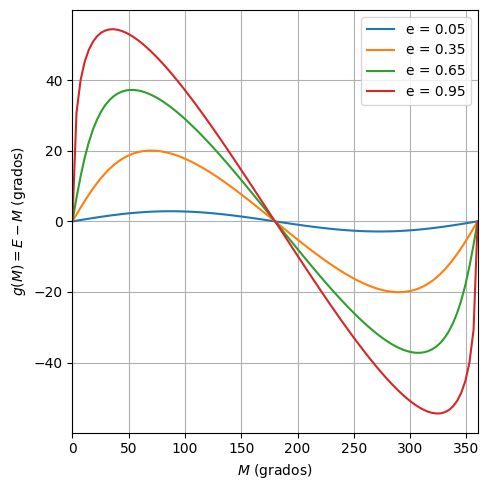

In [50]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.gca()

from numpy import array,linspace,pi
es=linspace(0.05,0.95,4)
Ms=linspace(0,2*pi,100)

for ex in es:
    #Valores de la anomalía excéntrica
    Es=[kepler_semianalitico(Mx,ex)[0] for Mx in Ms]
    ax.plot(array(Ms)*180/pi,array(Es)*180/pi-array(Ms)*180/pi,label=f"e = {ex:.2f}");
    
#Decoración
ax.legend();
ax.set_xlim((0,360))

ax.set_xlabel("$M$ (grados)")
ax.set_ylabel("$g(M)=E-M$ (grados)")
ax.grid()
fig.tight_layout()



### Solución analítica por aproximaciones sucesivas

Se puede usar la rutina de `pymcel` para el cálculo por aproximaciones sucesivas:

In [52]:
from pymcel import kepler_aproximacion

E1,error1,ni1=kepler_aproximacion(M,e,orden=1)
E2,error2,ni1=kepler_aproximacion(M,e,orden=2)
E3,error3,ni1=kepler_aproximacion(M,e,orden=3)

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E (orden e) = {E1*180/pi:.7f} (error {error1*M*180/pi})")
print(f"E (orden e^2) = {E2*180/pi:.7f} (error {error2*M*180/pi})")
print(f"E (orden e^3) = {E3*180/pi:.7f} (error {error3*M*180/pi})")

M = 37, e = 0.50
E (orden e) = 54.2407304 (error 6.006443353743711)
E (orden e^2) = 61.1252602 (error 0.9610525147400825)
E (orden e^3) = 63.0938414 (error 0.5471173899178785)


Se puede encontrar la solución usando una serie de orden arbitrario en $e$:

In [53]:
from pymcel.export import kepler_eserie
E8,error8,ni1=kepler_eserie(M,e,orden=8)

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E (orden e^8) = {E8*180/pi:.7f} (error {error8*M*180/pi})")

M = 37, e = 0.50
E (orden e^8) = 62.3103928 (error 0.003867448222173536)


### Solución por series de la ecuación de Kepler

La solución usando la expansión elíptica es:

In [55]:
from pymcel.export import kepler_bessel
E,error,ni=kepler_bessel(M,e,1e-8)

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420129936800
Error absoluto = 8.0e-08 grados
Intervalo = [62.38420121961613,62.38420137911987] grados
Número de iteraciones: 30


### Eficiencia de los métodos de solución

A continuación se compara el tiempo que toma la solución con los distintos métodos estudiados aquí para las siguientes condiciones:

In [58]:
e=0.48
M=298*pi/180

E,delta_semi,ni=kepler_semianalitico(M,e)
print(f"E = {E*180/pi}")
print(f"Error = {delta_semi}")


E = 270.4990668992051
Error = 7.451523386894413e-09


Este código hace la comparación de los tiempos usando el comando `timeit`:

In [59]:
from pymcel.export import funcion_kepler
kepler=lambda G,M,e:funcion_kepler(G,M,e)[0]

print("Semianalítico:")
%timeit -n 1000 kepler_semianalitico(M,e)
print("Newton:")
%timeit -n 1000 kepler_newton(M,e,E0,delta_semi)
print("Kepler (punto fijo):")
%timeit -n 1000 kepler_kepler(M,e,E0,delta_semi)
print("Método de bisección:")
%timeit -n 1000 optimize.bisect(kepler,0,2*pi,rtol=delta_semi,args=(M,e))
print("Método de Brent:")
%timeit -n 1000 optimize.brentq(kepler,0,2*pi,rtol=delta_semi,args=(M,e))
print("Método de Ridder:")
%timeit -n 1000 optimize.ridder(kepler,0,2*pi,rtol=delta_semi,args=(M,e))
print("Aproximaciones sucesivas:")
%timeit -n 1000 kepler_eserie(M,e,delta_semi)
print("Serie de Fourier con coeficientes de Bessel:")
%timeit -n 1000 kepler_bessel(M,e,delta_semi)

Semianalítico:
2.91 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Newton:
28.1 µs ± 5.76 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Kepler (punto fijo):
4.74 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Método de bisección:
110 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Método de Brent:
30.8 µs ± 681 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Método de Ridder:
48.3 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Aproximaciones sucesivas:
189 µs ± 5.72 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Serie de Fourier con coeficientes de Bessel:
45.3 µs ± 8.04 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Otra manera de hacerlo:

In [60]:
#Valores 
#Usa una tolerancia igual al error de la rutina semianalítica
delta=delta_semi
#Podría usar una tolerancia mucho menor si descomenta la línea abajo
#delta=1e-12
#Puede usar unos valores distintos de e y M para probar
#e=0.48
#M=298*pi/180
repeticiones=1000
from timeit import Timer
t_sem=Timer("kepler_semianalitico(M,e)",
            globals=globals()).timeit(repeticiones)/repeticiones*1e6
t_new=Timer("kepler_newton(M,e,E0,delta)",
            globals=globals()).timeit(repeticiones)/repeticiones*1e6
t_kep=Timer("kepler_kepler(M,e,E0,delta)",
            globals=globals()).timeit(repeticiones)/repeticiones*1e6
t_bis=Timer("optimize.bisect(kepler,0,2*pi,rtol=delta,args=(M,e))",
            globals=globals()).timeit(1000)/repeticiones*1e6
t_bre=Timer("optimize.brentq(kepler,0,2*pi,rtol=delta,args=(M,e))",
            globals=globals()).timeit(1000)/repeticiones*1e6
t_rid=Timer("optimize.ridder(kepler,0,2*pi,rtol=delta,args=(M,e))",
            globals=globals()).timeit(1000)/repeticiones*1e6
t_ese=Timer("kepler_eserie(M,e,delta)",
            globals=globals()).timeit(1000)/repeticiones*1e6
t_bes=Timer("kepler_bessel(M,e,delta)",
            globals=globals()).timeit(1000)/repeticiones*1e6

Un gráfico de los resultados sería:

/tmp/ipykernel_120717/533705734.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(etiquetas);


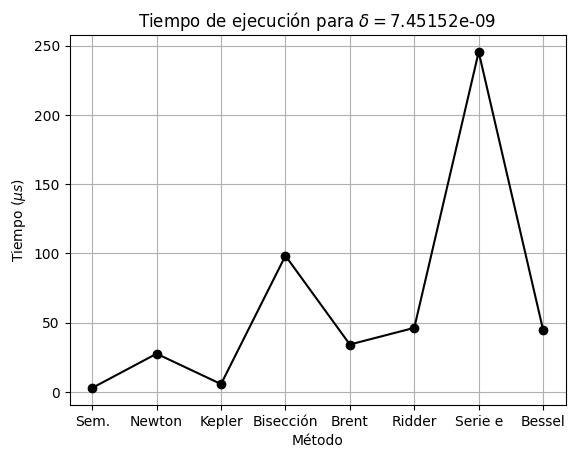

In [61]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()
valores=[t_sem,t_new,t_kep,t_bis,t_bre,t_rid,t_ese,t_bes]
etiquetas=["","Sem.","Newton","Kepler","Bisección","Brent","Ridder","Serie e","Bessel"]
ax.plot(valores,'ko-');
ax.set_xticklabels(etiquetas);

#Decoración
ax.grid()
ax.set_xlabel("Método");
ax.set_ylabel("Tiempo ($\mu s$)");
ax.set_title(f"Tiempo de ejecución para $\delta=${delta:g}");

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)